In [8]:
from sane import SANEAlgorithm
from sane import Cancer1Dataset
import random
import matplotlib.pyplot as plt

In [9]:
random.seed(1)

Объявляем параметры алгоритма (количество комбинаций, количество нейронов, размер скрытого слоя, количество соединений на нейрон)

In [10]:
algorithm_params = [
        (10, 500, 10, 11), # полносвязная сеть для датасета cancer1 (9 входов, 2 выхода)
        (50, 1000, 9, 8),
]

Создаём несколько алгоритмов


In [11]:
algorithms = []
for params in algorithm_params:
        algorithms.append(SANEAlgorithm(
                blueprints_population_size=params[0],
                neuron_population_size=params[1],
                hidden_layer_size=params[2],
                connections_count=params[3]))

Инициализируем алгоритмы

In [12]:
for i in range(len(algorithms)):
        algorithms[i].init(min_value=-1.0, max_value=1.0)

Заргужаем тестовые данные

In [13]:
cancer1_dataset = Cancer1Dataset()
x_train, y_train = cancer1_dataset.get_train_data()

Запускаем алгоритмы

In [14]:
results = []
for i in range(len(algorithms)):
        result = algorithms[i].train(
            generations_count=2000, x_train=x_train, y_train=y_train)
        results.append(result)

1999/2000 best fitness = 0.1875406012526239, current fitness = 0.205246258152011282

Выводим изменение среднеквадратичной ошибки (приспособленности) лучшей нейронной сети в процессе эволюции

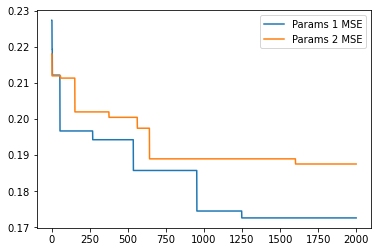

In [15]:
legend = []
for i in range(len(results)):
       plt.plot(results[i])
       legend.append("Params " + str(i+1) + " MSE")
plt.legend(legend)
plt.show()

Загружаем тестовые данные

In [22]:
x_test, y_test = cancer1_dataset.get_test_data()

Пропускаем тестовые данные через лучшие нейросети

In [23]:
results = []
for i in range(len(algorithms)):
        result = algorithms[i].test(
            x_test=x_test, y_test=y_test)
        results.append(result)

Выводим среднеквадратичную ошибку для каждой тестовой выборки

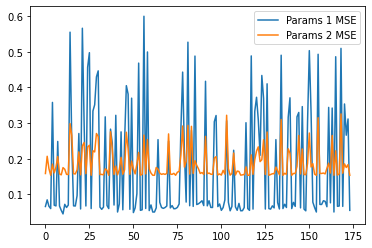

In [24]:
legend = []
for i in range(len(results)):
       plt.plot(results[i])
       legend.append("Params " + str(i+1) + " MSE")
plt.legend(legend)
plt.show()